# Homework No. 6

The following jupyter notebook contains the results of the sixth homework for the course: "Data Visualization" and was created by Franz Just.

To execute the jupyter notebook, the following libraries are required to install:
- pandas
- seaborn
- matplotlib
- numpy

The dataset that is used was published by **Jack Daoud** on **Kaggle** and can be found through the following **URL:** https://www.kaggle.com/jackdaoud/marketing-data.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("dataset.csv", index_col = None)
df = df.rename(columns={" Income ": "Income"})
df["Income"] = df["Income"].replace("[$,]", "", regex=True).astype(float)
df = df.dropna()
ID = df["ID"].tolist()
df1 = df[["Income", "Kidhome", "Teenhome", "Year_Birth", "Recency", "NumDealsPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebPurchases", "NumWebVisitsMonth"]]
df_1 = df1.values.tolist()

In order to calculate the corresponding cluster, a sub-dataset was created with the following columns:

- Income
- Kidhome
- Teenhome
- Year_Birth
- Recency
- NumDealsPurchases
- NumCatalogPurchases
- NumStorePurchases
- NumWebPurchases
- NumWebVisitsMonth

## Clustering k-Means Algorithm

The k-Means algorithm used in homework number 5 to compute the cluster for each customer.

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(df1)
li = kmeans.labels_
li = li.tolist()
df1['Cluster'] = li
df1.head()

,Income,Kidhome,Teenhome,Year_Birth,Recency,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Cluster
0,84835.0,0,0,1970,0,1,4,6,4,1,1
1,57091.0,0,0,1961,0,1,3,7,7,5,3
2,67267.0,0,1,1958,0,1,2,5,3,2,3
3,32474.0,1,1,1967,0,1,0,2,1,7,0
4,21474.0,1,0,1989,0,2,1,2,3,7,0


## Multidimensional data visualization

Normalizing the dataset to visualize it. 

In [4]:
df_scaled = df1.drop(["Income", "Year_Birth", "Recency", "Cluster", "Kidhome", "Teenhome", "NumWebVisitsMonth", "NumDealsPurchases"], axis = 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
arr_scaled = scaler.fit_transform(df_scaled) 
df_scaled = pd.DataFrame(arr_scaled, columns=df_scaled.columns,index=df_scaled.index)
df_scaled = df_scaled[:500]
df_scaled["Cluster"] = df1["Cluster"]
df_scaled.head()

,NumCatalogPurchases,NumStorePurchases,NumWebPurchases,Cluster
0,0.142857,0.461538,0.148148,1
1,0.107143,0.538462,0.259259,3
2,0.071429,0.384615,0.111111,3
3,0.000000,0.153846,0.037037,0
4,0.035714,0.153846,0.111111,0


In terms of the visualization, only 500 data entries are used instead of the whole dataframe. 

Both visualizations hereby analyse the sale channels with respect to the cluster computed with the k-Means algorithm. 

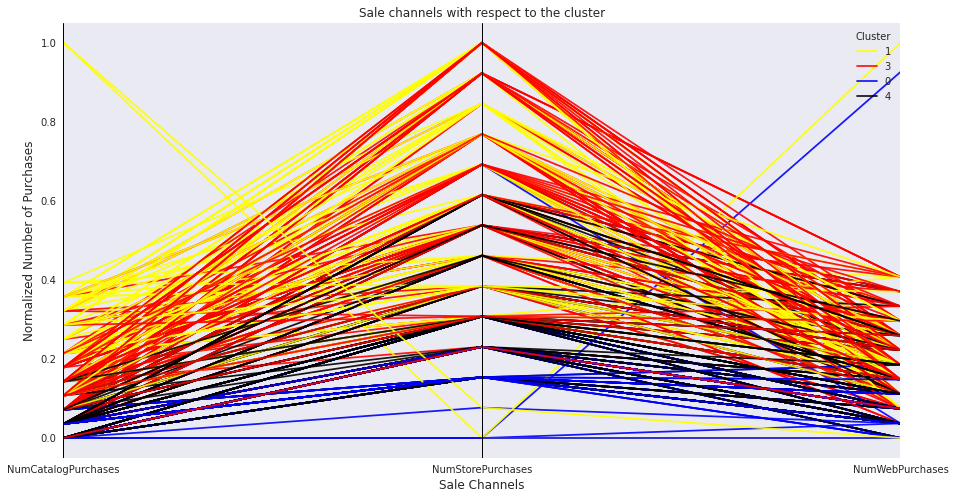

In [6]:
with plt.style.context(("ggplot", "seaborn")):
    fig = plt.figure(figsize=(15,8))
    pd.plotting.parallel_coordinates(df_scaled, "Cluster",
                                     color=["yellow", "red","blue", "black", "green"],
                                     alpha=0.9)
    plt.xlabel("Sale Channels", size=12)
    plt.ylabel("Normalized Number of Purchases", size=12)
    plt.title("Sale channels with respect to the cluster")
    plt.legend(loc="upper right",title="Cluster")

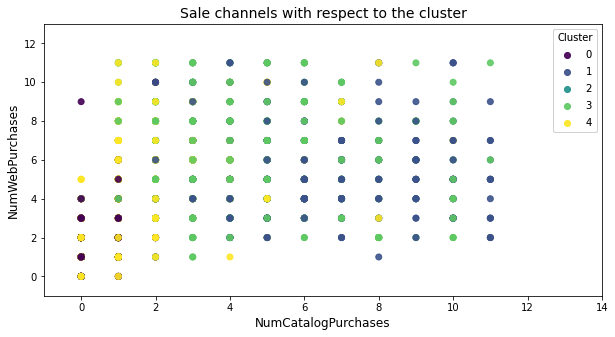

In [7]:
fig, ax = plt.subplots(figsize = (10, 5))
scatter = plt.scatter('NumCatalogPurchases', 'NumWebPurchases', c='Cluster',
             alpha=0.9, data=df1)
plt.ylim(-1, 13)
plt.xlim(-1, 14)
plt.xlabel("NumCatalogPurchases", size=12)
plt.ylabel("NumWebPurchases", size=12)
plt.title("Sale channels with respect to the cluster", size=14)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Cluster")
ax.add_artist(legend1);

## Source

[1] Jack Daoud; Marketing Analytics; https://www.kaggle.com/jackdaoud/marketing-data

-----------------------------------------------------------
Author: Franz Just